In [112]:
import os
import sys
import pandas as pd, geopandas as gp, matplotlib.pyplot as plt, numpy as np
import json
import fiona
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

### Path to project directory

[COVID-19 Transit Mapping for Blue Ribbon Task For Box Directory](https://mtcdrive.box.com/s/1xsylbgcyad7i5pmpe6vqzt0vfnvue5h)

In [136]:
box_data_dir = '../../../../../Box/DataViz Projects/Spatial Analysis and Mapping/COVID-19 Transit Mapping for Blue Ribbon Task Force/Data/Databases'

### Read ArcGIS Online password from txt file

In [137]:
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

In [138]:
!ls

Data
Join Transit Headway Data to Route Geography.ipynb
README.md
Scripts
Write RTD to CSV.ipynb
agolpassword.txt


In [139]:
pass_txt = 'agolpassword.txt'
password = get_file_contents(pass_txt)

### Conect to ArcGIS Online

In [140]:
gis = GIS("https://www.arcgis.com", "content_MTC", password)

### Test connection by returning user content

In [141]:
my_content = gis.content.search(query="owner:" + gis.users.me.username, 
                                item_type="Feature Layer", 
                                max_items=15)

my_content

[<Item title:"RTD_SF_SC_AC_Source_Geoms_Draft1" type:Feature Layer Collection owner:content_MTC>,
 <Item title:"Bay Area Ethnic Minority Concentration Tracts 2016 ACS 5 Year Estimates (May 2018)" type:Feature Layer Collection owner:content_MTC>,
 <Item title:"Change_in_Jobs_per_Acre_2010_2040___1_4_Milre" type:Feature Layer Collection owner:content_MTC>,
 <Item title:"emp_chg_per_acre_1_8_mile_10_cart" type:Feature Layer Collection owner:content_MTC>,
 <Item title:"Sonoma County Opportunity Sites (2018)" type:Feature Layer Collection owner:content_MTC>,
 <Item title:"CTCAC HCD Opportunity Areas (2017) - FMMP Built-Up Land" type:Feature Layer Collection owner:content_MTC>,
 <Item title:"CalEPA CalEnviroScreen 3.0 (2017)" type:Feature Layer Collection owner:content_MTC>,
 <Item title:"BCDC ART Indicators (2017)" type:Feature Layer Collection owner:content_MTC>,
 <Item title:"Major Rail Stations" type:Feature Layer Collection owner:content_MTC>,
 <Item title:"Public_Lands_Suitable_For_Hou

### List ESRI transit analysis geodatabase contents

In [145]:
box_data_dir

'../../../../../Box/DataViz Projects/Spatial Analysis and Mapping/COVID-19 Transit Mapping for Blue Ribbon Task Force/Data/Databases'

In [147]:
!ls '../../../../../Box/DataViz Projects/Spatial Analysis and Mapping/COVID-19 Transit Mapping for Blue Ribbon Task Force/Data/Databases'

CSV_results                   Regional Transit Database.gdb
Kearey_June2020_CSV_Results


In [150]:
fiona.listlayers(os.path.join(box_data_dir,'Regional Transit Database.gdb'))

['mn_nw',
 'mn_jc',
 'RG_Stops',
 'RG_Routes',
 'RV_Routes',
 'RV_Stops',
 'SA_Routes',
 'SA_Stops',
 'SB_Routes',
 'SB_Stops',
 'SC_Routes',
 'SC_Stops',
 'SF_Routes',
 'SF_Stops',
 'SI_Routes',
 'SI_Stops',
 'SM_Routes',
 'SM_Stops',
 'SO_Routes',
 'SO_Stops',
 'SR_Routes',
 'SR_Stops',
 'SS_Routes',
 'SS_Stops',
 'ST_Routes',
 'ST_Stops',
 'TD_Routes',
 'TD_Stops',
 'TriDelta_Routes',
 'TriDelta_Stops',
 'UC_Routes',
 'UC_Stops',
 'VC_Routes',
 'VC_Stops',
 'VN_Routes',
 'VN_Stops',
 'WC_Routes',
 'WC_Stops',
 'WH_Routes',
 'WH_Stops',
 'PE_Stops',
 'AC_Routes',
 'AC_Stops',
 'AM_Routes',
 'AM_Stops',
 'BA_Routes',
 'BA_Stops',
 'CC_Routes',
 'CC_Stops',
 'CE_Routes',
 'CE_Stops',
 'CM_Routes',
 'CM_Stops',
 'CT_Routes',
 'CT_Stops',
 'DE_Routes',
 'DE_Stops',
 'EM_Routes',
 'EM_Stops',
 'FS_Routes',
 'FS_Stops',
 'GF_Routes',
 'GF_Stops',
 'GG_Routes',
 'GG_Stops',
 'MA_Routes',
 'MA_Stops',
 'PE_Routes',
 'route_shape_repaired_6_22_20',
 'weekday_all_day_route_frequency_6_30_20',


### Read pretty transit route data from ESRI geodatabase

ACE train route was replaced with correct shape which was provided in the historical feed from January. Route shapes were generated previously using ESRI GTFS tools.

In [151]:
pretty_routes = gp.read_file(os.path.join(box_data_dir,'Regional Transit Database.gdb'), 
                             driver='FileGDB',
                             layer='route_shape_repaired_6_22_20')

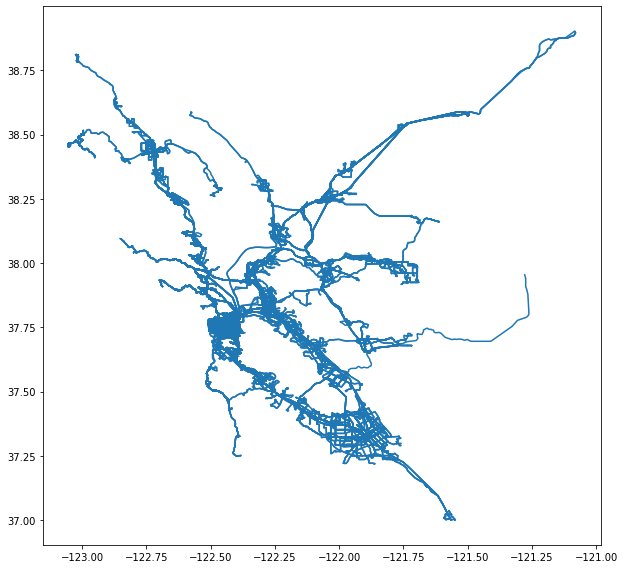

In [154]:
pretty_routes.plot(figsize=(10,10));

In [155]:
pretty_routes.crs

{'init': 'epsg:4326'}

In [156]:
pretty_routes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   shape_id          3068 non-null   object  
 1   route_id          1500 non-null   object  
 2   agency_id         1500 non-null   object  
 3   route_short_name  1499 non-null   object  
 4   route_long_name   1486 non-null   object  
 5   route_desc        159 non-null    object  
 6   route_type        1499 non-null   object  
 7   route_url         929 non-null    object  
 8   route_color       1270 non-null   object  
 9   route_text_color  1139 non-null   object  
 10  route_sort_order  1499 non-null   object  
 11  route_type_text   1500 non-null   object  
 12  agency_name       1500 non-null   object  
 13  Shape_Length      3069 non-null   float64 
 14  geometry          3057 non-null   geometry
dtypes: float64(1), geometry(1), object(13)
memory usage: 359.8+ KB


### Filter out SFO airport shuttle

In [157]:
pretty_routes['agency_name'].unique()

array(['Tri Delta Transit', 'AC Transit', None,
       'Capitol Corridor Joint Powers Authority',
       'Bay Area Rapid Transit', 'County Connection',
       'Commute.org Shuttles', 'Caltrain', 'Dumbarton Express Consortium',
       'Emery Go-Round', 'Fairfield and Suisun Transit',
       'Golden Gate Ferry', 'Golden Gate Transit', 'Marin Transit',
       'Petaluma Transit', 'Rio Vista Delta Breeze',
       'Sonoma Marin Area Rail Transit', 'San Francisco Bay Ferry', 'VTA',
       'San Francisco Municipal Transportation Agency',
       'San Francisco International Airport', 'SamTrans',
       'Sonoma County Transit', 'Santa Rosa CityBus',
       'City of South San Francisco', 'SolTrans', 'Tideline Water Taxi',
       'Union City Transit', 'Vacaville City Coach', 'VINE Transit',
       'WestCat (Western Contra Costa)',
       'Livermore Amador Valley Transit Authority',
       'Altamont Corridor Express'], dtype=object)

In [158]:
pretty_routes = pretty_routes[pretty_routes['agency_name'] != 'San Francisco International Airport']

### Join routes with headway csvs for the following transit service time periods January 2020:

- AM Peak (6:00-10:00AM)
- Midday (10:00AM-3:00PM)
- PM Peak (3:00-7:00PM)
- Latenight (7:00PM-6:00AM)

In [127]:
!ls '../../../../../Box/DataViz Projects/Spatial Analysis and Mapping/COVID-19 Transit Mapping for Blue Ribbon Task Force/Data/Databases/CSV_results'

2020-01 2020-06


In [129]:
# Read January CSVs to dataframe

jan_all_day = pd.read_csv(os.path.join(box_data_dir,'2020-01/all_6am_6am_blue_ribbon_calcs.csv'))
jan_am_peak = pd.read_csv(os.path.join(box_data_dir,'2020-01/am_blue_ribbon_calcs.csv'))
jan_mid_day = pd.read_csv(os.path.join(box_data_dir,'2020-01/mid_blue_ribbon_calcs.csv'))
jan_pm_peak = pd.read_csv(os.path.join(box_data_dir,'2020-01/pm_blue_ribbon_calcs.csv'))
jan_late_day = pd.read_csv(os.path.join(box_data_dir,'2020-01/late_blue_ribbon_calcs.csv'))

In [130]:
jan_am_peak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   agency_id         297 non-null    object 
 1   agency_name       297 non-null    object 
 2   route_id          297 non-null    object 
 3   route_short_name  297 non-null    object 
 4   route_long_name   297 non-null    object 
 5   route_type        297 non-null    int64  
 6   route_url         297 non-null    object 
 7   total_departures  297 non-null    int64  
 8   median_headways   297 non-null    float64
 9   mean_headways     297 non-null    float64
 10  st_dev_headways   267 non-null    float64
 11  stop_count        297 non-null    int64  
 12  service_class     297 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 30.3+ KB


In [159]:
jan_all_rt_hdwy_geo = gp.GeoDataFrame.merge(pretty_routes[['route_id','geometry']],
                                            jan_all_day,
                                            on='route_id',
                                            how='inner',
                                           indicator=True)

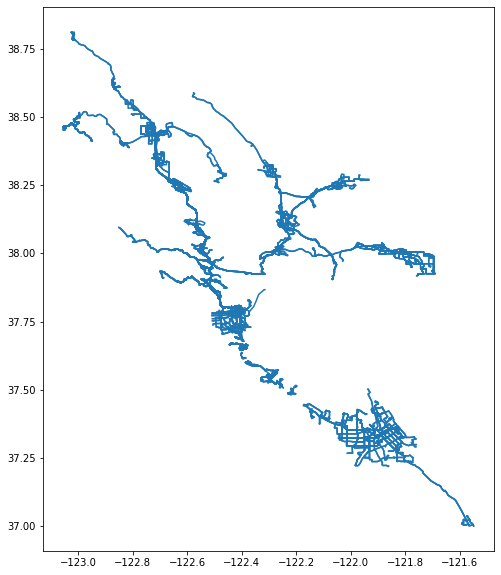

In [96]:
jan_all_rt_hdwy_geo.plot(figsize=(10,10));

In [105]:
jan_am_rt_hdwy_geo = gp.GeoDataFrame.merge(pretty_routes[['route_id','geometry']],
                                            jan_am_peak,
                                            on='route_id',
                                            how='inner',
                                           indicator=True)

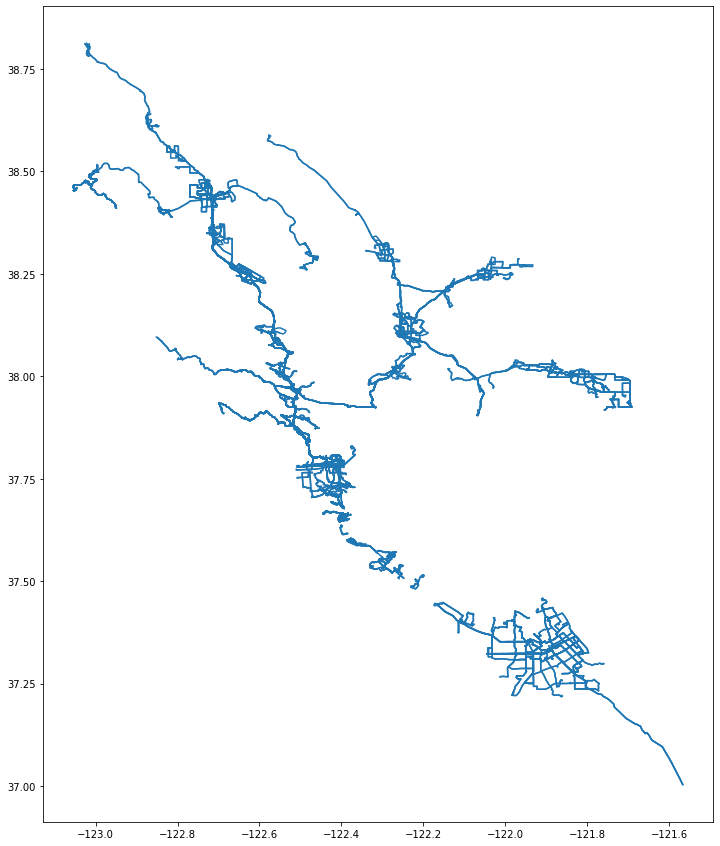

In [111]:
jan_am_rt_hdwy_geo.plot(figsize=(15,15));

### Join routes with headway csvs for the following transit service time periods July 2020:

- AM Peak (6:00-10:00AM)
- Midday (10:00AM-3:00PM)
- PM Peak (3:00-7:00PM)
- Latenight (7:00PM-6:00AM)

In [97]:
june_all_day = pd.read_csv(os.path.join(box_data_dir,'2020-06/all_6am_6am_blue_ribbon_calcs.csv'))
june_am_peak = pd.read_csv(os.path.join(box_data_dir,'2020-06/am_blue_ribbon_calcs.csv'))
june_mid_day = pd.read_csv(os.path.join(box_data_dir,'2020-06/mid_blue_ribbon_calcs.csv'))
june_pm_peak = pd.read_csv(os.path.join(box_data_dir,'2020-06/pm_blue_ribbon_calcs.csv'))
june_late_day = pd.read_csv(os.path.join(box_data_dir,'2020-06/late_blue_ribbon_calcs.csv'))

In [109]:
june_am_peak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   agency_id         225 non-null    object 
 1   agency_name       225 non-null    object 
 2   route_id          225 non-null    object 
 3   route_short_name  225 non-null    object 
 4   route_long_name   225 non-null    object 
 5   route_type        225 non-null    int64  
 6   route_url         225 non-null    object 
 7   total_departures  225 non-null    int64  
 8   median_headways   225 non-null    float64
 9   mean_headways     225 non-null    float64
 10  st_dev_headways   216 non-null    float64
 11  stop_count        225 non-null    int64  
 12  service_class     225 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 23.0+ KB


In [98]:
june_all_rt_hdwy_geo = gp.GeoDataFrame.merge(pretty_routes[['route_id','geometry']],
                                            june_all_day,
                                            on='route_id',
                                            how='inner',
                                           indicator=True)

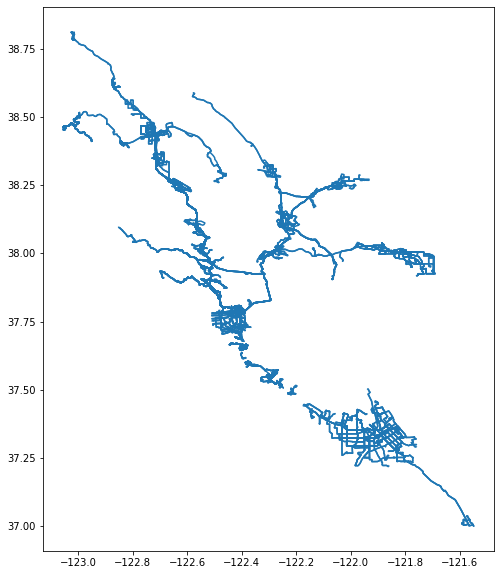

In [99]:
june_all_rt_hdwy_geo.plot(figsize=(10,10));